In [46]:
from os import listdir
from os.path import isfile, join
from random import randrange
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image

# EDA

In [47]:
trainPath = "pklot/train"
trainFolder = [f for f in listdir(trainPath) if isfile(join(trainPath, f))]
trainImages = []
for x in trainFolder:
    if ".jpg" in x:
        trainImages.append(trainPath + "/" + x)
len(trainImages)

8691

In [48]:
validationPath = "pklot/valid"
validationFolder = [f for f in listdir(validationPath) if isfile(join(validationPath, f))]
validationImages = []
for x in validationFolder:
    if ".jpg" in x:
        validationImages.append(validationPath + "/" + x)
len(validationImages)

2483

In [49]:
testPath = "pklot/test"
testFolder = [f for f in listdir(testPath) if isfile(join(testPath, f))]
testImages = []
for x in testFolder:
    if ".jpg" in x:
        testImages.append(testPath + "/" + x)
len(testImages)

1242

In [50]:
allImages = trainImages + validationImages + testImages
len(allImages)

12416

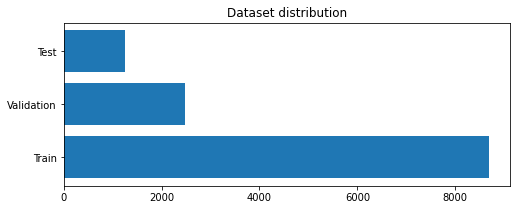

In [51]:
x = ['Train', 'Validation', 'Test']
y = [len(trainImages), len(validationImages), len(testImages)]

plt.figure(figsize=(8, 3))
plt.barh(x, y)
plt.title("Dataset distribution")
plt.show()

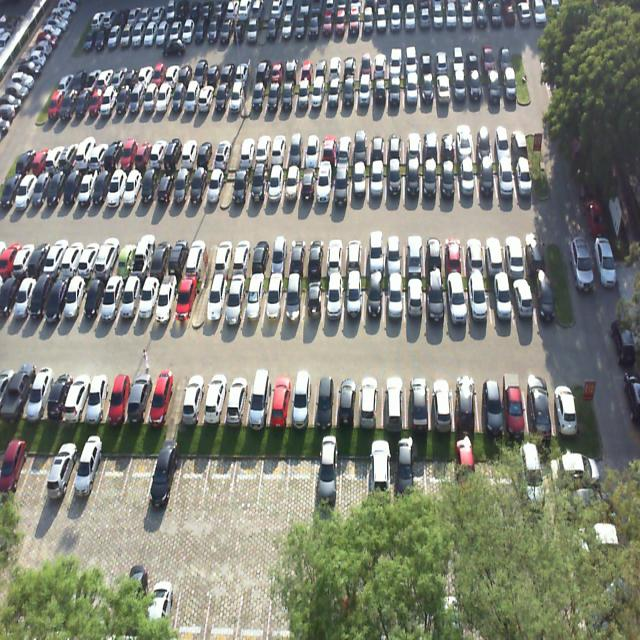

In [52]:
randomImage = allImages[randrange(len(allImages))]
Image(filename=randomImage, width=500)

In [53]:
txtRandomImage = randomImage.split(".jpg")[0] + ".txt"
f = open(txtRandomImage, "r")
print(f.read())
f.close()

1 0.23515625 0.28828125 0.0359375 0.0625
1 0.259375 0.290625 0.03515625 0.06640625
1 0.2859375 0.290625 0.03359375 0.06640625
1 0.3109375 0.2890625 0.0359375 0.06640625
1 0.3359375 0.290625 0.03359375 0.0625
1 0.3765625 0.2875 0.0328125 0.0640625
1 0.4046875 0.28828125 0.02734375 0.059375
1 0.4296875 0.290625 0.02578125 0.0640625
1 0.4546875 0.2875 0.0265625 0.0640625
1 0.48125 0.2890625 0.028125 0.0609375
1 0.50625 0.28671875 0.025 0.05390625
1 0.5328125 0.28671875 0.0265625 0.05703125
1 0.5609375 0.28203125 0.025 0.053125
1 0.5890625 0.2828125 0.02890625 0.059375
1 0.61796875 0.2828125 0.025 0.059375
1 0.64375 0.28125 0.02734375 0.05390625
1 0.6734375 0.28125 0.02734375 0.05390625
1 0.7015625 0.278125 0.02734375 0.0515625
1 0.73125 0.28046875 0.03046875 0.05546875
1 0.7609375 0.27734375 0.028125 0.0625
1 0.78671875 0.27734375 0.03125 0.05390625
1 0.81640625 0.27421875 0.0359375 0.0625
1 0.19765625 0.40078125 0.0421875 0.059375
1 0.2234375 0.39921875 0.04140625 0.0625
1 0.25 0.4015625

In [54]:
spaceEmpty = 376121
spaceOccupied = 335735

print("space-empty: " + str(spaceEmpty))
print("space-occupied: " + str(spaceOccupied))

space-empty: 376121
space-occupied: 335735


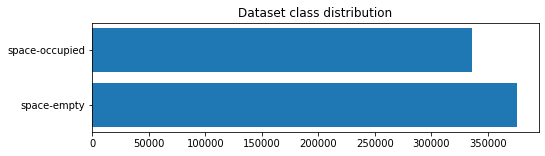

In [55]:
x = ['space-empty', 'space-occupied']
y = [spaceEmpty, spaceOccupied]

plt.figure(figsize=(8, 2))
plt.barh(x, y)
plt.title("Dataset class distribution")
plt.show()

# Object Detection

## Training & Validation

In [ ]:
# DON'T RUN THIS CODE RIGHT NOW, IT WILL TAKES 6 HOURS!
!darknet detector train pklot/obj.data pklot/yolo-obj.cfg yolov4.conv.137 -map

In [57]:
weightPath = "backup"
weightFolder = [f for f in listdir(weightPath) if isfile(join(weightPath, f))]
for x in weightFolder:
    print(x)

yolo-obj_1000.weights
yolo-obj_2000.weights
yolo-obj_3000.weights
yolo-obj_4000.weights
yolo-obj_5000.weights
yolo-obj_6000.weights
yolo-obj_best.weights
yolo-obj_final.weights
yolo-obj_last.weights


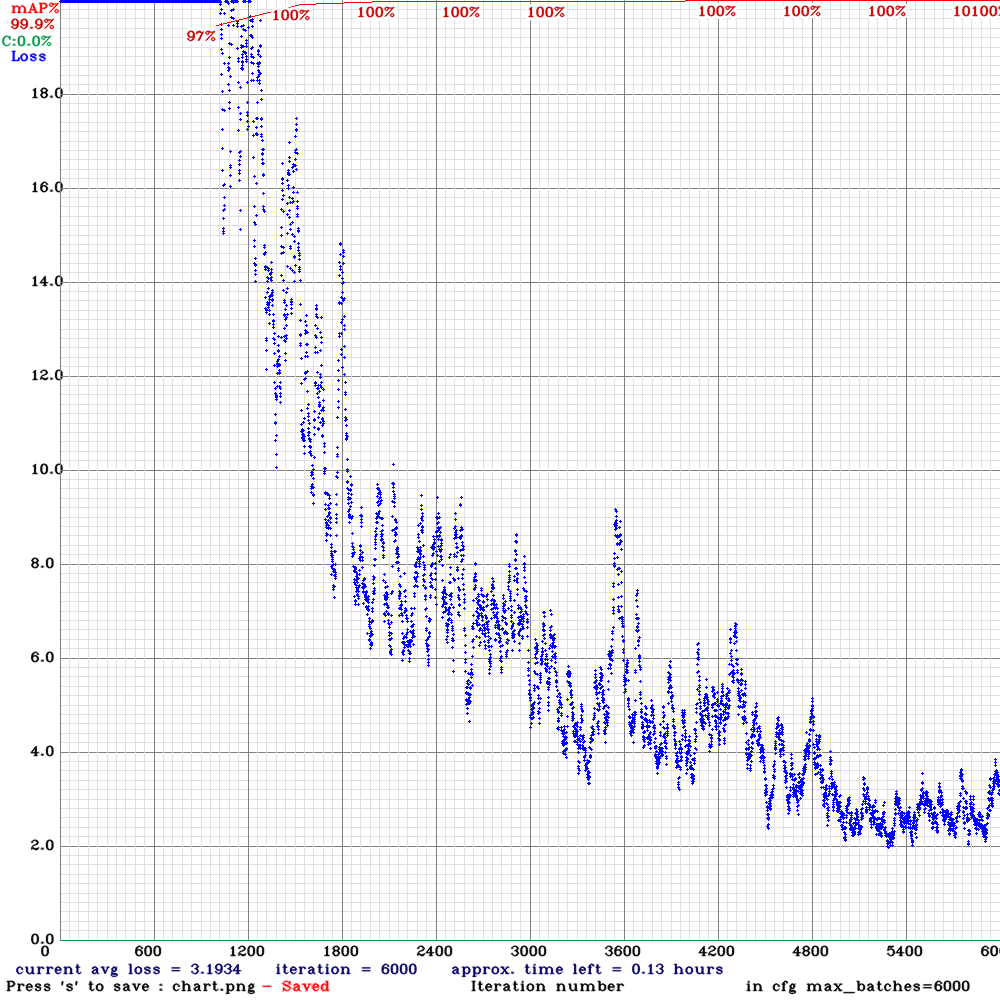

In [58]:
Image(filename='chart_yolo-obj.png', width=800)

## Testing

In [63]:
randomTestImage = testImages[randrange(len(testImages))]
!darknet detector test pklot/obj.data pklot/yolo-obj.cfg -dont_show backup/yolo-obj_final.weights $randomTestImage -i 0 -thresh 0.25

net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 


 CUDA-version: 11020 (11060), cuDNN: 8.1.0, GPU count: 1  
 OpenCV version: 4.5.5
 0 : compute_capability = 860, cudnn_half = 0, GPU: NVIDIA GeForce RTX 3060 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    320 x 320 x   3 ->  320 x 320 x  32 0.177 BF
   1 conv     64       3 x 3/ 2    320 x 320 x  32 ->  160 x 160 x  64 0.944 BF
   2 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   3 route  1 		                           ->  160 x 160 x  64 
   4 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   5 conv     32       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  32 0.105 BF
   6 conv     64       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  64 0.944 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 160 x 160 x  64 0.002 BF
   8 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   9 route  8 2 	                           ->  160 x 160 x 128 
  10 conv


 seen 64, trained: 384 K-images (6 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
pklot/test/2013-01-18_17_30_13_jpg.rf.1632c7e410b916d84eb56703744bbcea.jpg: Predicted in 39.955000 milli-seconds.
space-empty: 100%
space-empty: 100%
space-empty: 100%
space-occupied: 100%
space-empty: 100%
space-empty: 100%
space-empty: 100%
space-empty: 100%
space-empty: 100%
space-occupied: 100%
space-occupied: 100%
space-empty: 100%
space-empty: 100%
space-empty: 100%
space-occupied: 100%
space-empty: 100%
space-occupied: 100%
space-empty: 100%
space-empty: 100%
space-empty: 100%
space-empty: 100%
space-empty: 100%
space-empty: 100%
space-empty: 100%
space-empty: 100%
space-empty: 100%
space-empty: 100%
space-empty: 99%


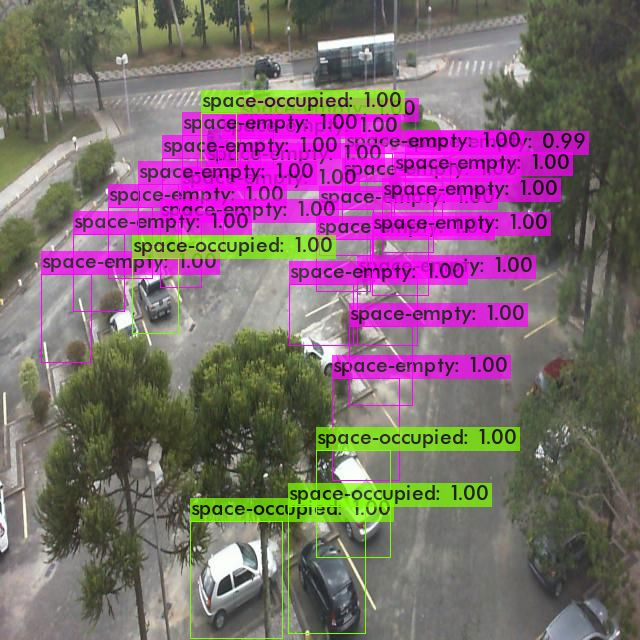

In [64]:
Image(filename='predictions.jpg', width=500)

In [67]:
randomTestImage = testImages[randrange(len(testImages))]
!darknet detector test pklot/obj.data pklot/yolo-obj.cfg -dont_show backup/yolo-obj_final.weights $randomTestImage -i 0 -thresh 0.25

net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 384 K-images (6 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
pklot/test/2012-10-26_16_39_56_jpg.rf.704d4caa082bb8fe691ab66f3190b1d8.jpg: Predicted in 40.082000 milli-seconds.
space-empty: 100%
space-empty: 100%
space-occupied: 100%
space-empty: 100%
space-occupied: 100%
space-empty: 100%
space-occupied: 100%
space-occupied: 100%
space-empty: 99%
space-occupied: 100%
space-occupied: 100%
space-occupied: 100%
space-empty: 41%
space-occupied: 90%
space-occupied: 100%
space-empty: 100%
space-occupied: 100%
space-occupied: 99%
space-occupied: 100%
space-occupied: 100%
space-empty: 100%
space-occupied: 100%
space-empty: 100%
space-occupied: 100%

 CUDA-version: 11020 (11060), cuDNN: 8.1.0, GPU count: 1  
 OpenCV version: 4.5.5
 0 : compute_capability = 860, cudnn_half = 0, GPU: NVIDIA GeForce RTX 3060 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    320 x 320 x   3 ->  320 x 320 x  32 0.177 BF
   1 conv     64       3 x 3/ 2    320 x 320 x  32 ->  160 x 160 x  64 0.944 BF
   2 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   3 route  1 		                           ->  160 x 160 x  64 
   4 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   5 conv     32       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  32 0.105 BF
   6 conv     64       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  64 0.944 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 160 x 160 x  64 0.002 BF
   8 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   9 route  8 2 	                           ->  160 x 160 x 128 
  10 conv

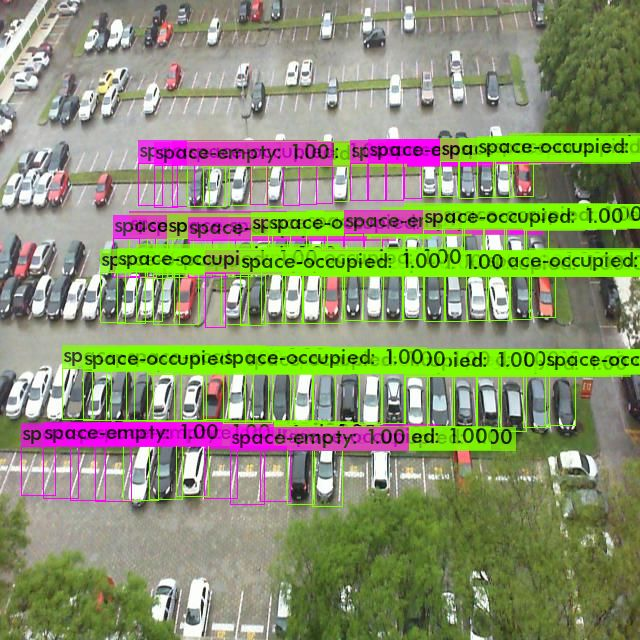

In [68]:
Image(filename='predictions.jpg', width=500)